# Crime Analysis in Chicago (2001 vs. 2018)

## Descriptive Data Analysis

### Setup

In [21]:
# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt

### Plot settings

In [22]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = (25, 10) #increase figure size

In [23]:
"""
# Read in datasets
df_2001_2004 = pd.read_csv("data/Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False)
df_2005_2007 = pd.read_csv("data/Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)
df_2008_2011 = pd.read_csv("data/Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
df_2012_2017 = pd.read_csv("data/Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)

# Create dataframes per year
df_2001 = df_2001_2004[df_2001_2004['Year'] == 2001]
df_2002 = df_2001_2004[df_2001_2004['Year'] == 2002]
df_2003 = df_2001_2004[df_2001_2004['Year'] == 2003]
df_2004 = df_2001_2004[df_2001_2004['Year'] == 2004]

df_2005 = df_2005_2007[df_2005_2007['Year'] == 2005]
df_2006 = df_2005_2007[df_2005_2007['Year'] == 2006]
df_2007 = df_2005_2007[df_2005_2007['Year'] == 2007]

df_2008 = df_2008_2011[df_2008_2011['Year'] == 2008]
df_2009 = df_2008_2011[df_2008_2011['Year'] == 2009]
df_2010 = df_2008_2011[df_2008_2011['Year'] == 2010]
df_2011 = df_2008_2011[df_2008_2011['Year'] == 2011]

df_2012 = df_2012_2017[df_2012_2017['Year'] == 2012]
df_2013 = df_2012_2017[df_2012_2017['Year'] == 2013]
df_2014 = df_2012_2017[df_2012_2017['Year'] == 2014]
df_2015 = df_2012_2017[df_2012_2017['Year'] == 2015]
df_2016 = df_2012_2017[df_2012_2017['Year'] == 2016]
df_2017 = df_2012_2017[df_2012_2017['Year'] == 2017]

# List with all datasets
export_datasets = [df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017]

# Export dataframes into csv files per year
year = 2001
for dataset in export_datasets:
    name = "data/crime_" + str(year) + ".csv"
    cols = dataset.columns
    #df = pd.read_csv(name, )
    dataset.to_csv(name, index=False)
    #dataset.to_csv(name, index=False)
    year += 1

# Loop through csv files and resave to fix index column
year = 2001
for dataset in export_datasets:
    name = "crime_" + str(year) + ".csv"
    df = pd.read_csv("data/" + name).drop(dataset.columns[0], axis=1)
    df.to_csv("data/" + name, index=0)
    year += 1
""";

In [4]:
# Load all datasets
df_2003 = pd.read_csv("data/crime_2003.csv")
df_2003.name = "Crime in 2003"
df_2003.year = "2003"

df_2007 = pd.read_csv("data/crime_2007.csv")
df_2007.name = "Crime in 2007"
df_2007.year = "2007"

df_2016 = pd.read_csv("data/crime_2016.csv")
df_2016.name = "Crime in 2016"
df_2016.year = "2016"

datasets = [df_2003,
            df_2007,
            df_2016]

df_2008 = pd.read_csv("data/crime_2008.csv")
df_2008.name = "Crime in 2008"
df_2008.year = "2008"

df_2009 = pd.read_csv("data/crime_2009.csv")
df_2009.name = "Crime in 2009"
df_2009.year = "2009"

df_2010 = pd.read_csv("data/crime_2010.csv")
df_2010.name = "Crime in 2010"
df_2010.year = "2010"

df_2011 = pd.read_csv("data/crime_2011.csv")
df_2011.name = "Crime in 2011"
df_2011.year = "2011"

df_2012 = pd.read_csv("data/crime_2012.csv")
df_2012.name = "Crime in 2012"
df_2012.year = "2012"


datasets_by_area = [df_2008,
                    df_2009,
                    df_2010,
                    df_2011,
                    df_2012]

C:\Users\desu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Size

In [5]:
for dataset in datasets:
    print("Dataset: {}, Shape: {}".format(dataset.name, dataset.shape))

Dataset: Crime in 2003, Shape: (475913, 22)
Dataset: Crime in 2007, Shape: (621848, 22)
Dataset: Crime in 2016, Shape: (265462, 22)


### Missingness

In [6]:
for dataset in datasets:
    print("Dataset: {}".format(dataset.name))
    print(dataset.isnull().sum())
    print('\n')

Dataset: Crime in 2003
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       2
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      19
Community Area            50
FBI Code                   0
X Coordinate            4728
Y Coordinate            4728
Year                       0
Updated On                 0
Latitude                4728
Longitude               4728
Location                4728
dtype: int64


Dataset: Crime in 2007
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       5
Arrest                     0
Domestic                   0
Beat       

### Set date as index

In [ ]:
for dataset in datasets:
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset.set_index('Date', inplace=True)
    dataset.sort_index(inplace=True)
    print(dataset.name, "done")

for dataset in datasets_by_area:
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset.set_index('Date', inplace=True)
    dataset.sort_index(inplace=True)
    print(dataset.name, "done")

Crime in 2003 done
Crime in 2007 done
Crime in 2016 done
Crime in 2008 done


### Remove rows with missing values

In [ ]:
for dataset in datasets:
    dataset.dropna(inplace=True)
    
for dataset in datasets_by_area:
    dataset.dropna(inplace=True)

### Remove unnecessary columns

In [ ]:
for dataset in datasets:
    dataset.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'Beat', 'Ward', 'FBI Code', 'Updated On', 'Latitude', 'Longitude'], axis=1, inplace=True)

for dataset in datasets_by_area:
    dataset.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'Beat', 'Ward', 'FBI Code', 'Updated On', 'Latitude', 'Longitude'], axis=1, inplace=True)

### Pickle dataframes for easier loading

In [ ]:
for dataset in datasets:
    dataset.to_pickle("./data/crime_" + dataset.year + ".pkl")

for dataset in datasets_by_area:
    dataset.to_pickle("./data/crime_" + dataset.year + ".pkl")

### Load pickles to bypass data loading/formatting

In [24]:
df_2003 = pd.read_pickle("./data/crime_2003.pkl")
df_2003.name = "Crime in 2003"
df_2003.year = "2003"

df_2007 = pd.read_pickle("./data/crime_2007.pkl")
df_2007.name = "Crime in 2007"
df_2007.year = "2007"

df_2016 = pd.read_pickle("./data/crime_2016.pkl")
df_2016.name = "Crime in 2016"
df_2016.year = "2016"

datasets = [df_2003,
            df_2007,
            df_2016]

df_2008 = pd.read_pickle("./data/crime_2008.pkl")
df_2008.name = "Crime in 2008"
df_2008.year = "2008"

df_2009 = pd.read_pickle("./data/crime_2009.pkl")
df_2009.name = "Crime in 2009"
df_2009.year = "2009"

df_2010 = pd.read_pickle("./data/crime_2010.pkl")
df_2010.name = "Crime in 2010"
df_2010.year = "2010"

df_2011 = pd.read_pickle("./data/crime_2011.pkl")
df_2011.name = "Crime in 2011"
df_2011.year = "2011"

df_2012 = pd.read_pickle("./data/crime_2012.pkl")
df_2012.name = "Crime in 2012"
df_2012.year = "2012"

datasets_by_area = [df_2008,
                    df_2009,
                    df_2010,
                    df_2011,
                    df_2012]

### Number of crimes per year

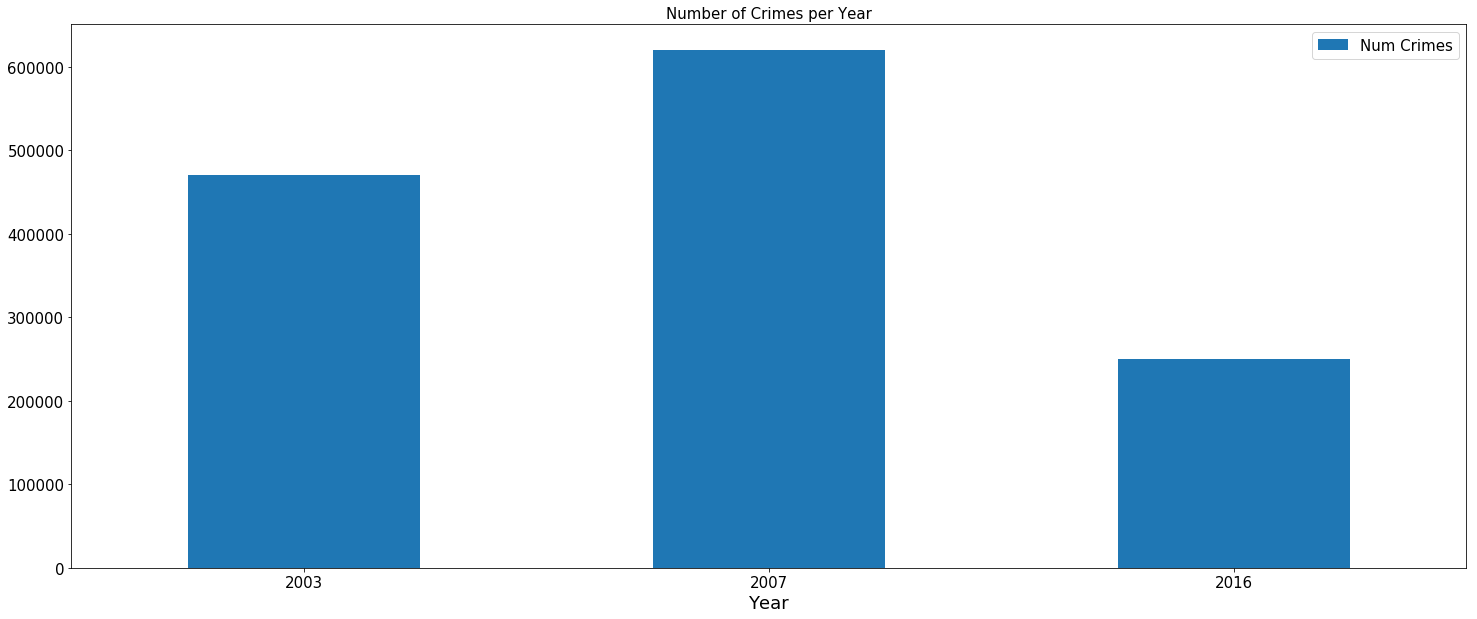

In [25]:
years = []
data_len = []
for dataset in datasets:
    years.append(dataset.year)
    data_len.append(len(dataset))

df_num = pd.DataFrame({'Year': years,'Num Crimes': data_len}).set_index('Year')
df_num.plot(kind='bar', rot=0, title="Number of Crimes per Year");

Description: This histogram shows the number of crimes in 2003, 2007 and 2016. From the graph, 2007 has the largest number of crimes and the number in 2016 is the lowest. The number of crimes in 2003 is greater than that in 2016 but larger than in 2007. 

### Crime per community area (2003, 2007, 2016)

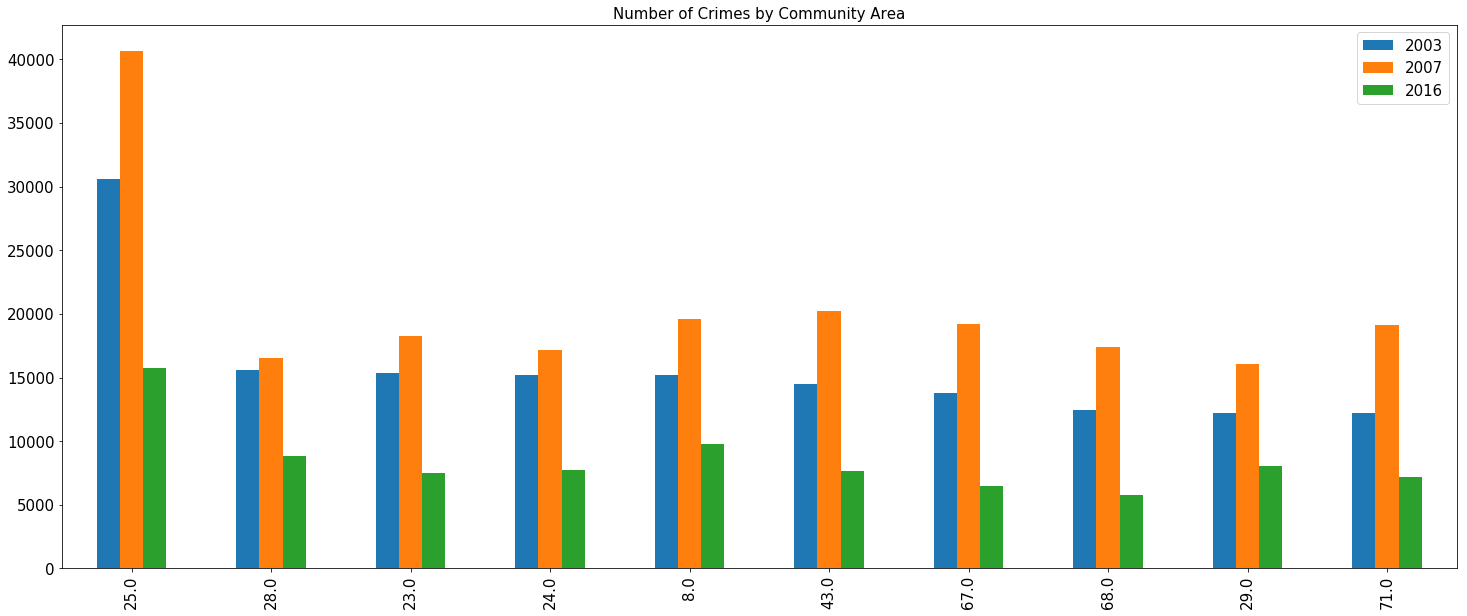

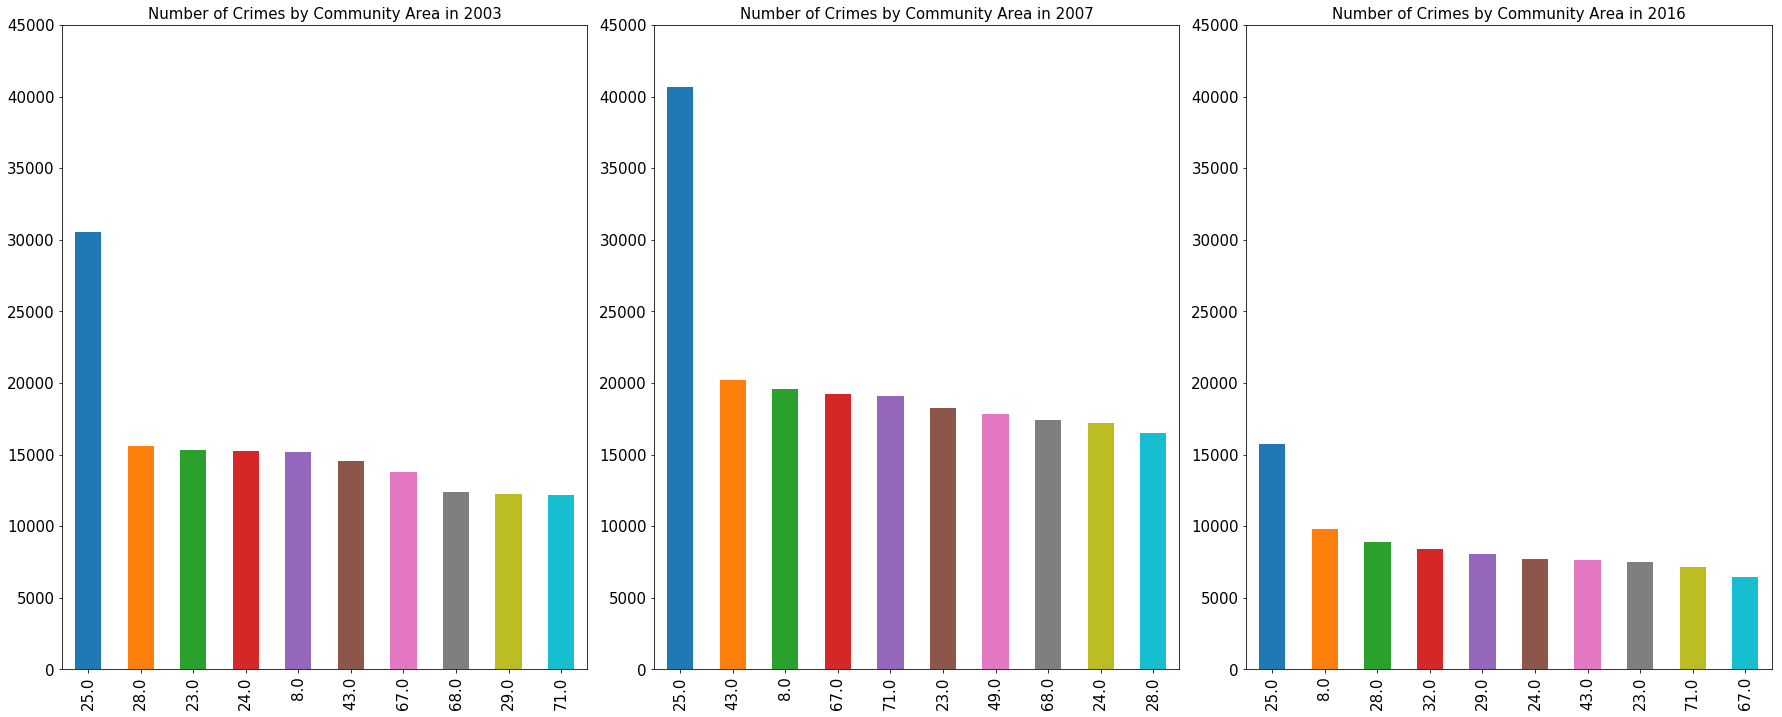

In [26]:
category = 'Community Area'
num_categories = 71

df_areas = pd.DataFrame()
df_areas['2003'] = df_2003[category].value_counts()#[:num_categories]
df_areas['2007'] = df_2007[category].value_counts()#[:num_categories]
df_areas['2016'] = df_2016[category].value_counts()#[:num_categories]

plt.rcParams.update({'font.size': 22})
df_areas.head(10).plot(kind='bar', rot=90, title="Number of Crimes by Community Area");

fig, axs = plt.subplots(1,3)
plt.tight_layout()

plt.rcParams.update({'font.size': 18}) # Increase font size

df_areas['2003'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[0], title="Number of Crimes by Community Area in 2003").set_ylim(0, 45000);
df_areas['2007'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[1], title="Number of Crimes by Community Area in 2007").set_ylim(0, 45000);
df_areas['2016'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[2], title="Number of Crimes by Community Area in 2016").set_ylim(0, 45000);

Description: The graphs above show the number of crimes happened in 10 community areas in the years of 2003, 2007 and 2016. Overall, all 10 community areas had their highest numbers in 2007 and the lowest in 2016. 
The community area called 25.0 had much higher numbers of crimes than other 9 areas in these three years. The other 9 areas had similar numbers of crimes in these three years. In 2003, the areas of 29.0 and 71.0 had the lowest numbers. In 2007, area 28.0 had the lowest number. And area 67.0 had the lowest in 2016.

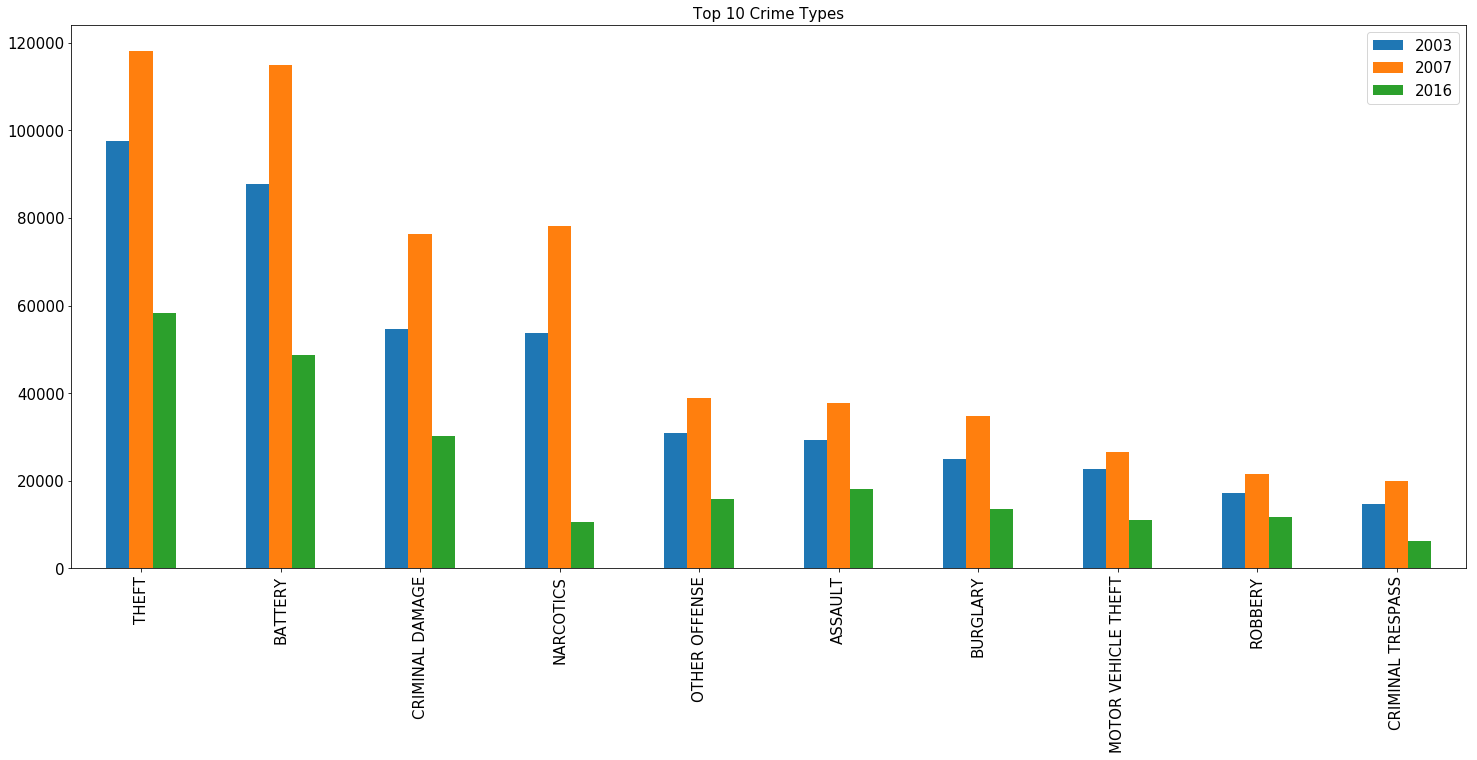

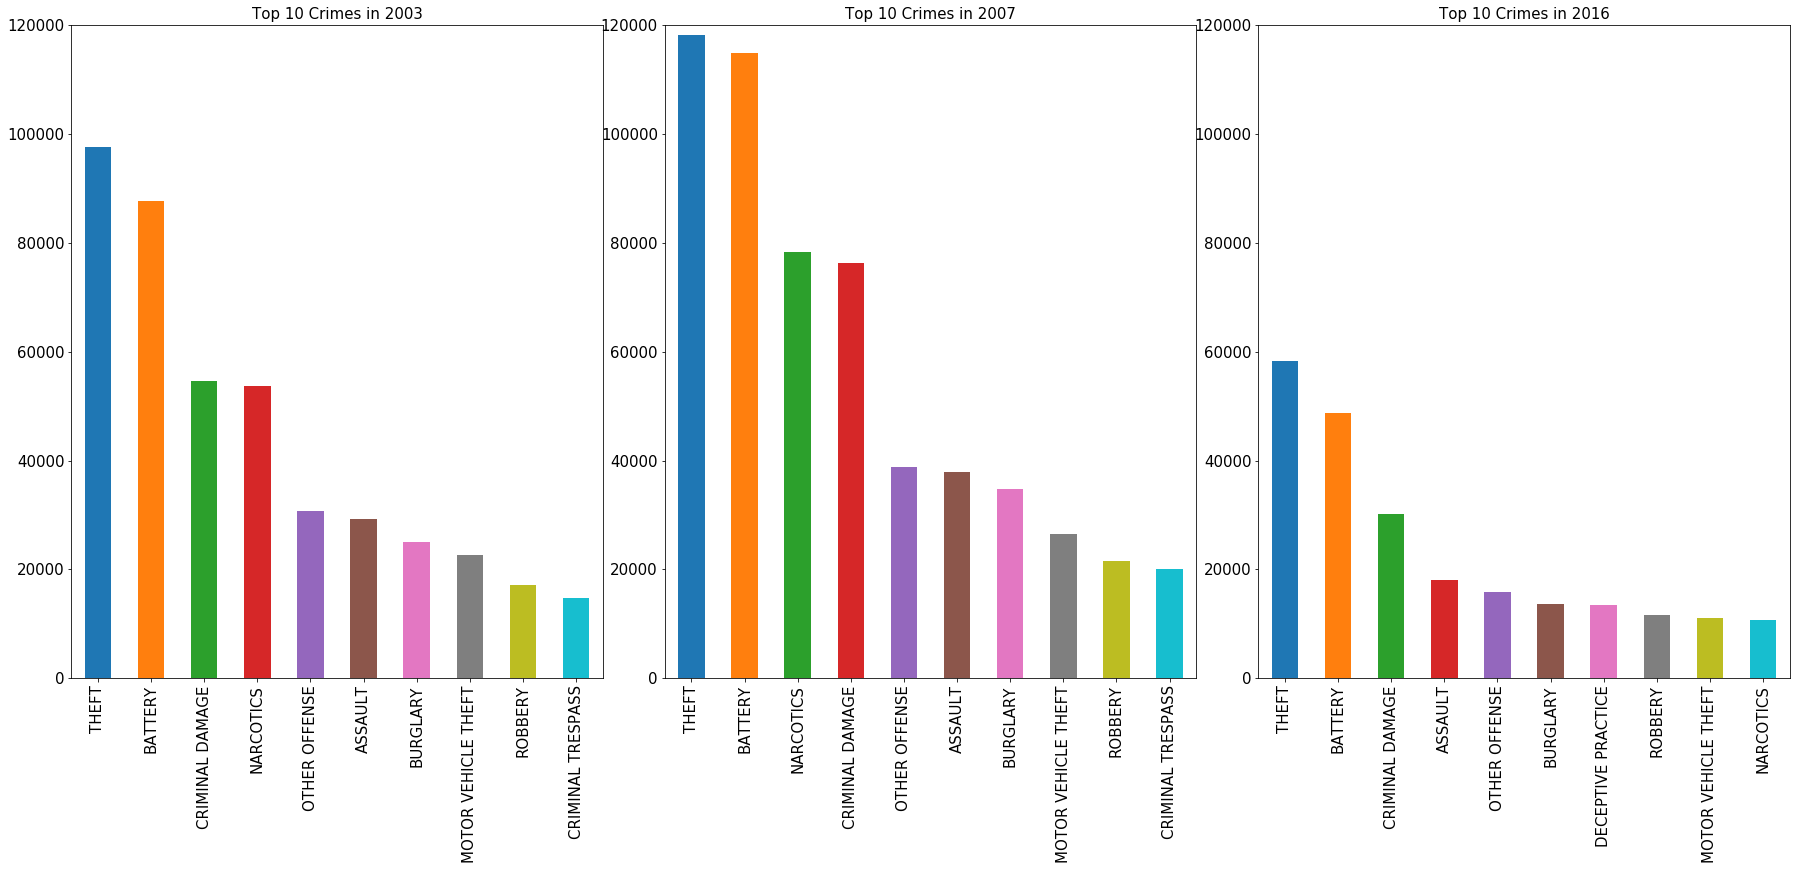

In [27]:
#%matplotlib inline

category = 'Primary Type'
num_categories = 10

df_areas = pd.DataFrame()
df_areas['2003'] = df_2003[category].value_counts()
#df_areas['2004'] = df_2004[category].value_counts()
#df_areas['2005'] = df_2005[category].value_counts()
#df_areas['2006'] = df_2006[category].value_counts()
df_areas['2007'] = df_2007[category].value_counts()
#df_areas['2008'] = df_2008[category].value_counts()
#df_areas['2009'] = df_2009[category].value_counts()
#df_areas['2010'] = df_2010[category].value_counts()
#df_areas['2011'] = df_2011[category].value_counts()
#df_areas['2012'] = df_2012[category].value_counts()
#df_areas['2013'] = df_2013[category].value_counts()
#df_areas['2014'] = df_2014[category].value_counts()
#df_areas['2015'] = df_2015[category].value_counts()
df_areas['2016'] = df_2016[category].value_counts()

df_areas[['2003', '2007', '2016']].head(num_categories).plot(kind='bar', rot=90, title="Top 10 Crime Types");

fig, axs = plt.subplots(1,3)
#axs.

plt.tight_layout()

df_top_2003 = df_areas['2003']
df_top_2007 = df_areas['2007']
df_top_2016 = df_areas['2016']

df_top_2003.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[0], title="Top 10 Crimes in 2003").set_ylim(0, 120000);
df_top_2007.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[1], title="Top 10 Crimes in 2007").set_ylim(0, 120000);
df_top_2016.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[2], title="Top 10 Crimes in 2016").set_ylim(0, 120000);

Description: Thses graphs describe the numbers of the top 10 crimes happened in the years of 2003, 2007 and 2016. Theft and battery are the two most common types of crimes for all three years. Robbery and criminal trespass happened less frequently in these three years for the top 10 items. In the year 2007, all types of crimes happened most requently, and in 2016, they happened less frequently. 

## Group 2008-2012 data into one dataframe by disctrict

In [28]:
# Combine datasets
df_2008_2012 = pd.concat(datasets_by_area)

# Get count of number of crimes
df_2008_2012['Num Crimes'] = 1

# Drop unnecessary columns
df_2008_2012.drop(columns=['Arrest', 'Domestic', 'District', 'X Coordinate', 'Y Coordinate', 'Year'], axis=1, inplace=True)

# Group by community area
df_2008_2012 = df_2008_2012.groupby(['Community Area']).sum()

# Drop unnecessary first row
df_2008_2012.drop([0], inplace=True)

# Read in income data
df_income = pd.read_csv("./data/Per_Capita_Income.csv", index_col=0)
df_income.index.names = ['Community Area']

# Join Dataframes
df_2008_2012 = df_2008_2012.join(df_income, how='outer')
df_2008_2012.columns

# Rename column (to remove space)
df_2008_2012.rename(columns={"PER CAPITA INCOME ": "PER CAPITA INCOME"}, inplace=True)

## Graph crime vs income (2008-2012)

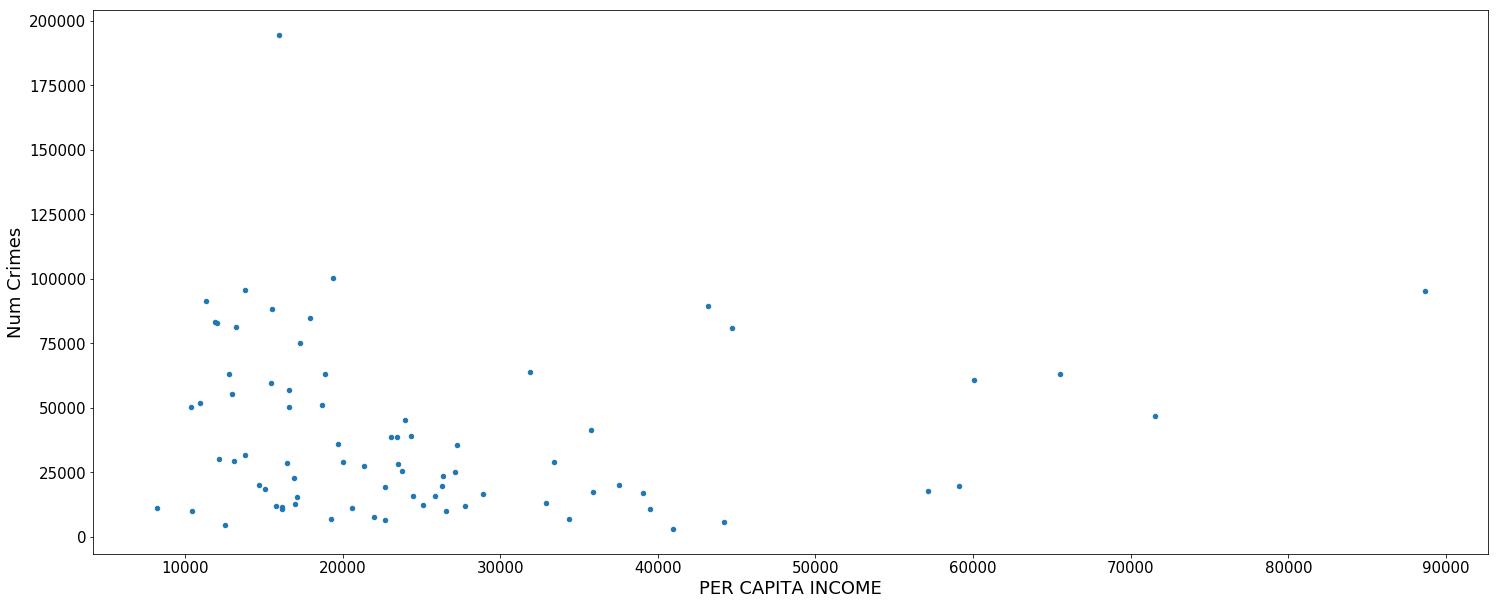

In [29]:
df_2008_2012.plot.scatter(x='PER CAPITA INCOME', y='Num Crimes');

Description: From the graph, most areas had their per capita incomes in the range of 10,000 to 40,000. Most values for crimes were in the range between 7,000 and 100,000. Regardless of the outliers, the areas with 10,000 to 20,000 per capita income had the broadest range of numbers of crimes, which was from about 7,000 to 100,000. The areas with 20,000 to 40,000 per capita income had the narrowest range of numbers of crimes, which was from about 7,000 to 50,000. From the graph, there is a rough tendency that areas with low per capita income would more likely have higher numbers of crimes than those in high-income community. 

## Top 3 Crimes per year (2003, 2007, 2016)

In [30]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

Text(0.5,1,'Top 3 Crimes in 2016')

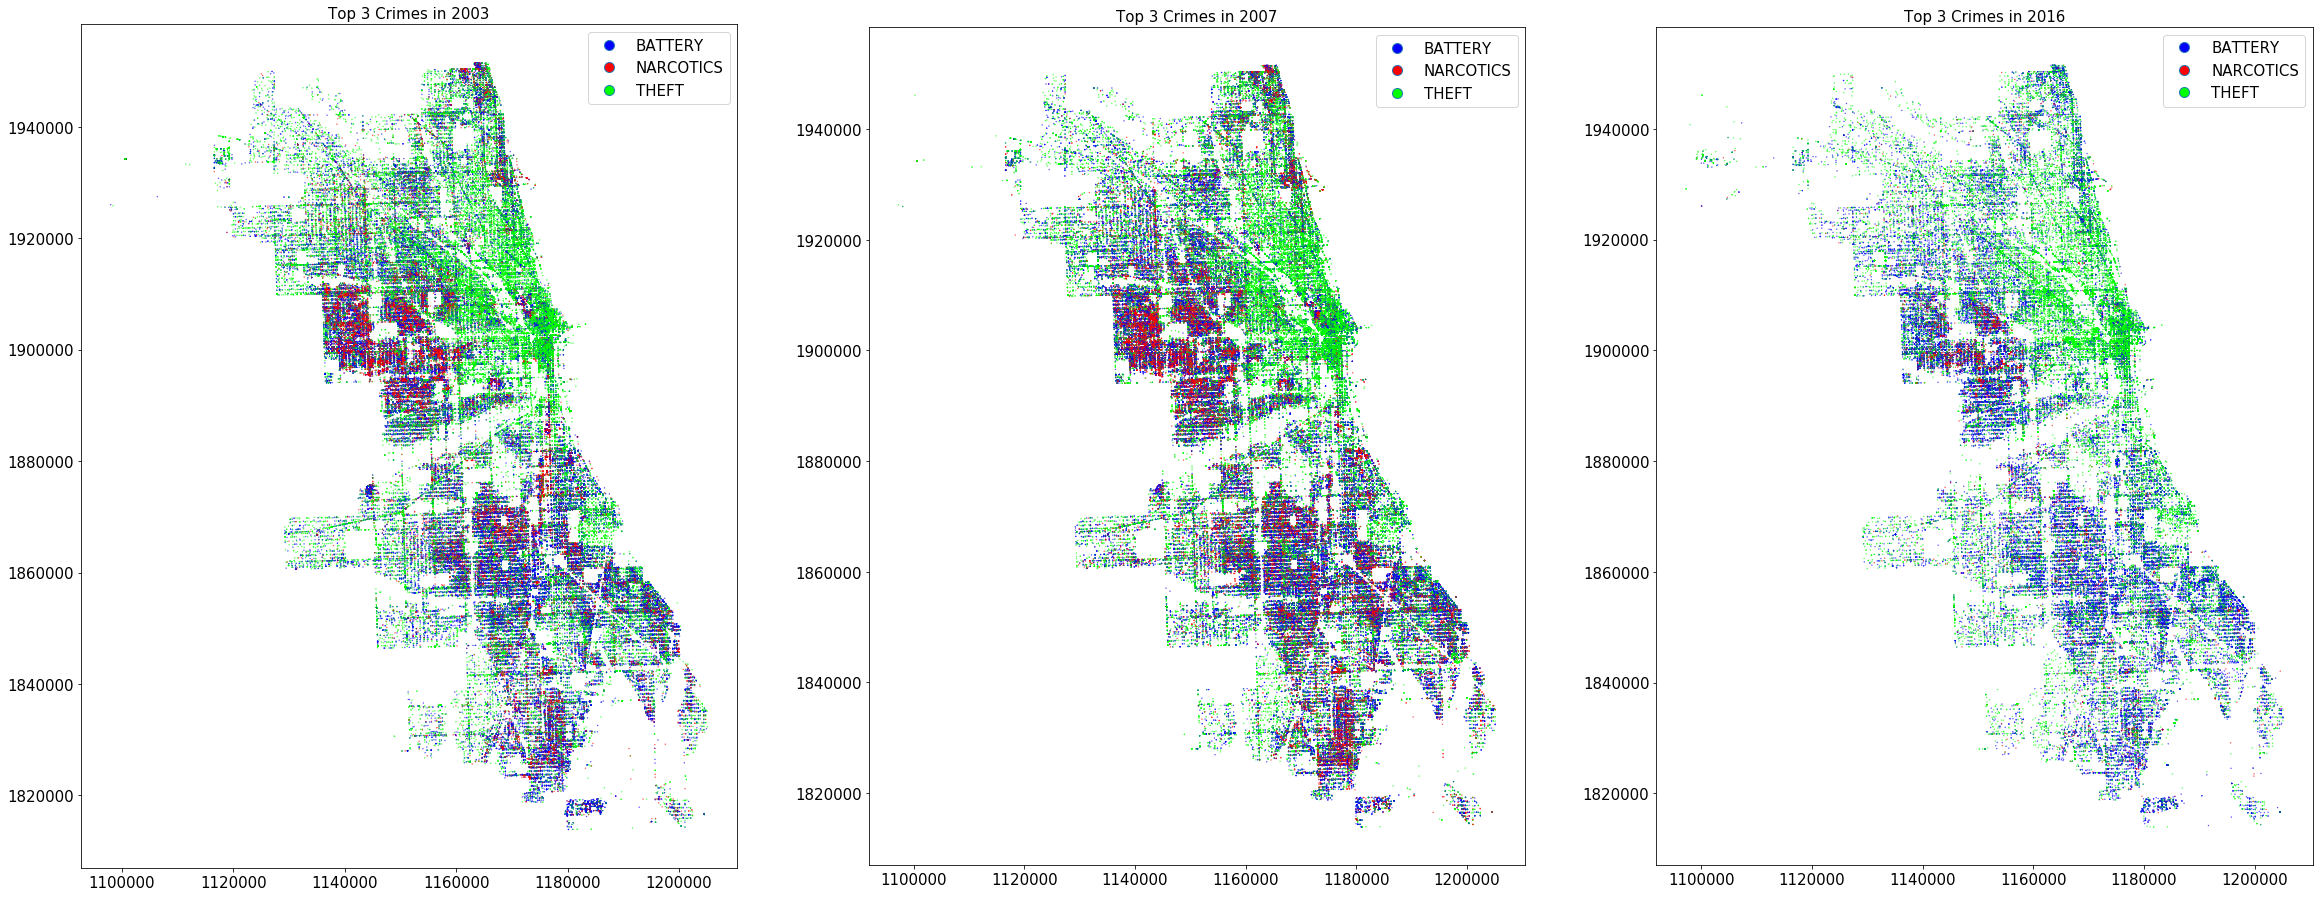

In [31]:
crs={'init':'epsg:4326'}
axs={}

# zip the Longtitude and Latitude together. Each point represents a row in Data frame
Geo_2003 = [Point(xy) for xy in zip (df_2003["X Coordinate"], df_2003["Y Coordinate"])]
Geo_2007 = [Point(xy) for xy in zip (df_2007["X Coordinate"], df_2007["Y Coordinate"])]
Geo_2016 = [Point(xy) for xy in zip (df_2016["X Coordinate"], df_2016["Y Coordinate"])]

crime_types = ["THEFT", "BATTERY", "NARCOTICS"]

Geo_df_2003 = gpd.GeoDataFrame(df_2003, crs=crs, geometry=Geo_2003)
Geo_df_2003_top_3 = Geo_df_2003[Geo_df_2003['Primary Type'].isin(crime_types)]

Geo_df_2007 = gpd.GeoDataFrame(df_2007, crs=crs, geometry=Geo_2007)
Geo_df_2007_top_3 = Geo_df_2007[Geo_df_2007['Primary Type'].isin(crime_types)]

Geo_df_2016 = gpd.GeoDataFrame(df_2016, crs=crs, geometry=Geo_2016)
Geo_df_2016_top_3 = Geo_df_2016[Geo_df_2016['Primary Type'].isin(crime_types)]

plt.rcParams['figure.figsize'] = (40, 20) #increase figure size
fig,axs = plt.subplots(1,3)
#fig, ax = plt.subplots(1, 1)

Geo_df_2003_top_3.plot(ax=axs[0],markersize=0.1, column='Primary Type', legend=True, cmap='brg')
Geo_df_2007_top_3.plot(ax=axs[1],markersize=0.1, column='Primary Type', legend=True, cmap='brg')
Geo_df_2016_top_3.plot(ax=axs[2],markersize=0.1, column='Primary Type', legend=True, cmap='brg')

#ax.set_title('Crimes happened in Chicago in 2003')
axs[0].set_title('Top 3 Crimes in 2003')
axs[1].set_title('Top 3 Crimes in 2007')
axs[2].set_title('Top 3 Crimes in 2016')

Description: From the three graphs, more crimes happened in 2003 and 2007 than in 2016. In these three years, the middle left area had the largest number of narcotics crimes than other areas, and the middle right area and the top area had the largest number of theft crimes. In these three years, battery most happened in the bottom and the middle left areas in Chicago. 

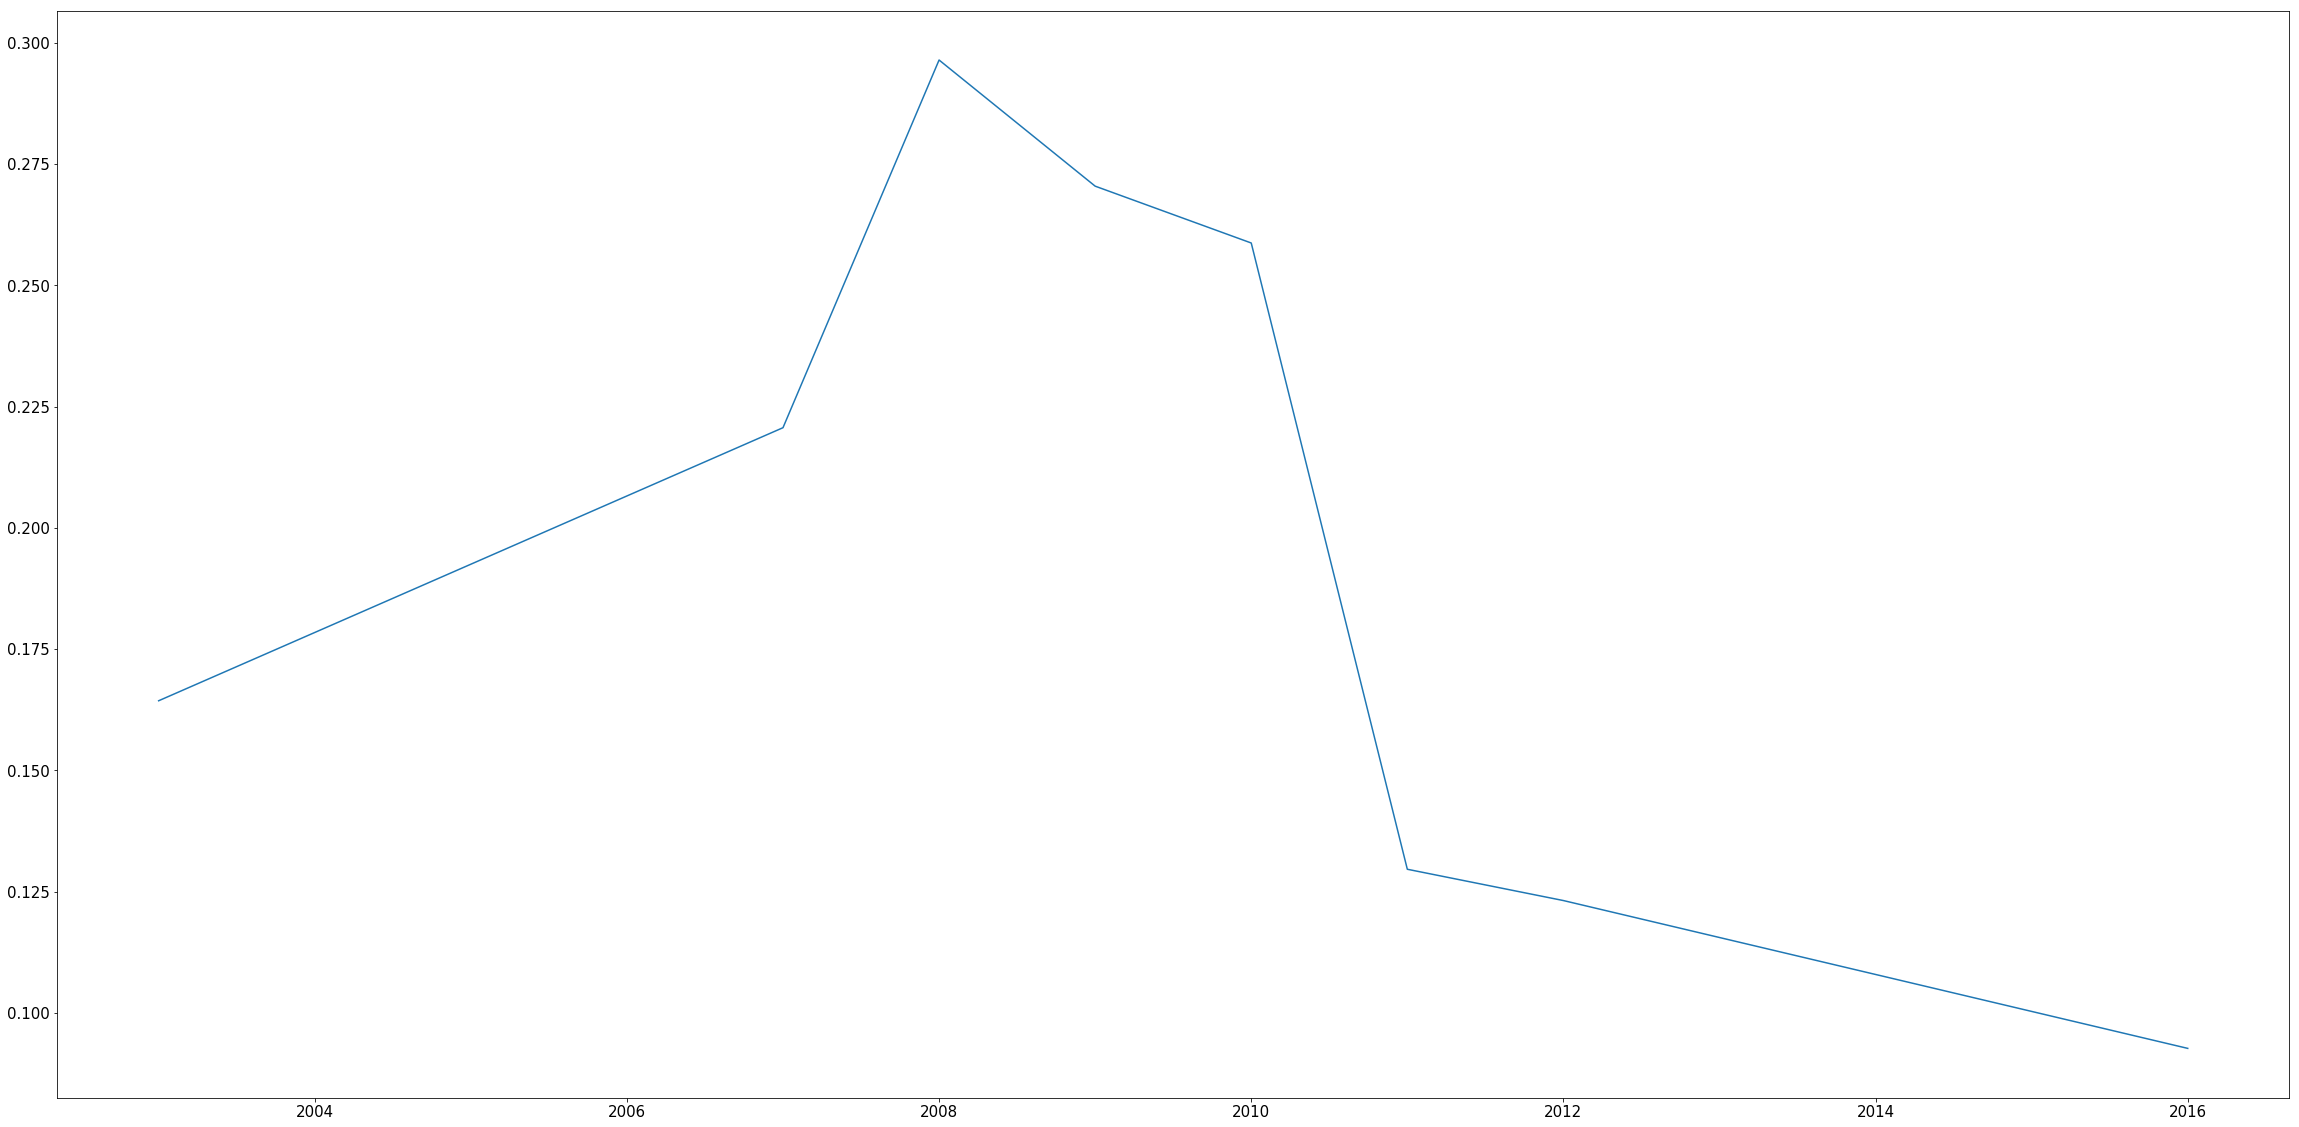

In [32]:
all_capita = np.array([2_866_361, 2_811_035, 2_830_026, 2_851_268, 2_695_598, 2_705_248, 2_714_856, 2_704_958])
all_years = np.array([2003, 2007, 2008, 2009, 2010, 2011, 2012, 2016])
all_crimes = np.array([len(df_2003), len(df_2007), len(df_2008), len(df_2009), len(df_2010), len(df_2011), len(df_2012), len(df_2016)])
crime_per_capita = all_crimes / all_capita
df_crime_per_capita = pd.DataFrame(data={"Number of Crimes": all_crimes, "Capita": all_capita, "Crimes per Capita": crime_per_capita}, index=all_years)
plt.plot(all_years, crime_per_capita)

The above graph represents the crime rate per capita throughout the years we are studying (2003, 2007 to 2012, and 2016). Among these years, crime rate per capita started peaking around 2007, peaked at year 2008, and the peak vanished around 2011. Note that this time period coincides with the recession happended around 2008.

Name:Crime in 2003
Name:Crime in 2007
Name:Crime in 2008
Name:Crime in 2009
Name:Crime in 2010
Name:Crime in 2011
Name:Crime in 2012
Name:Crime in 2016


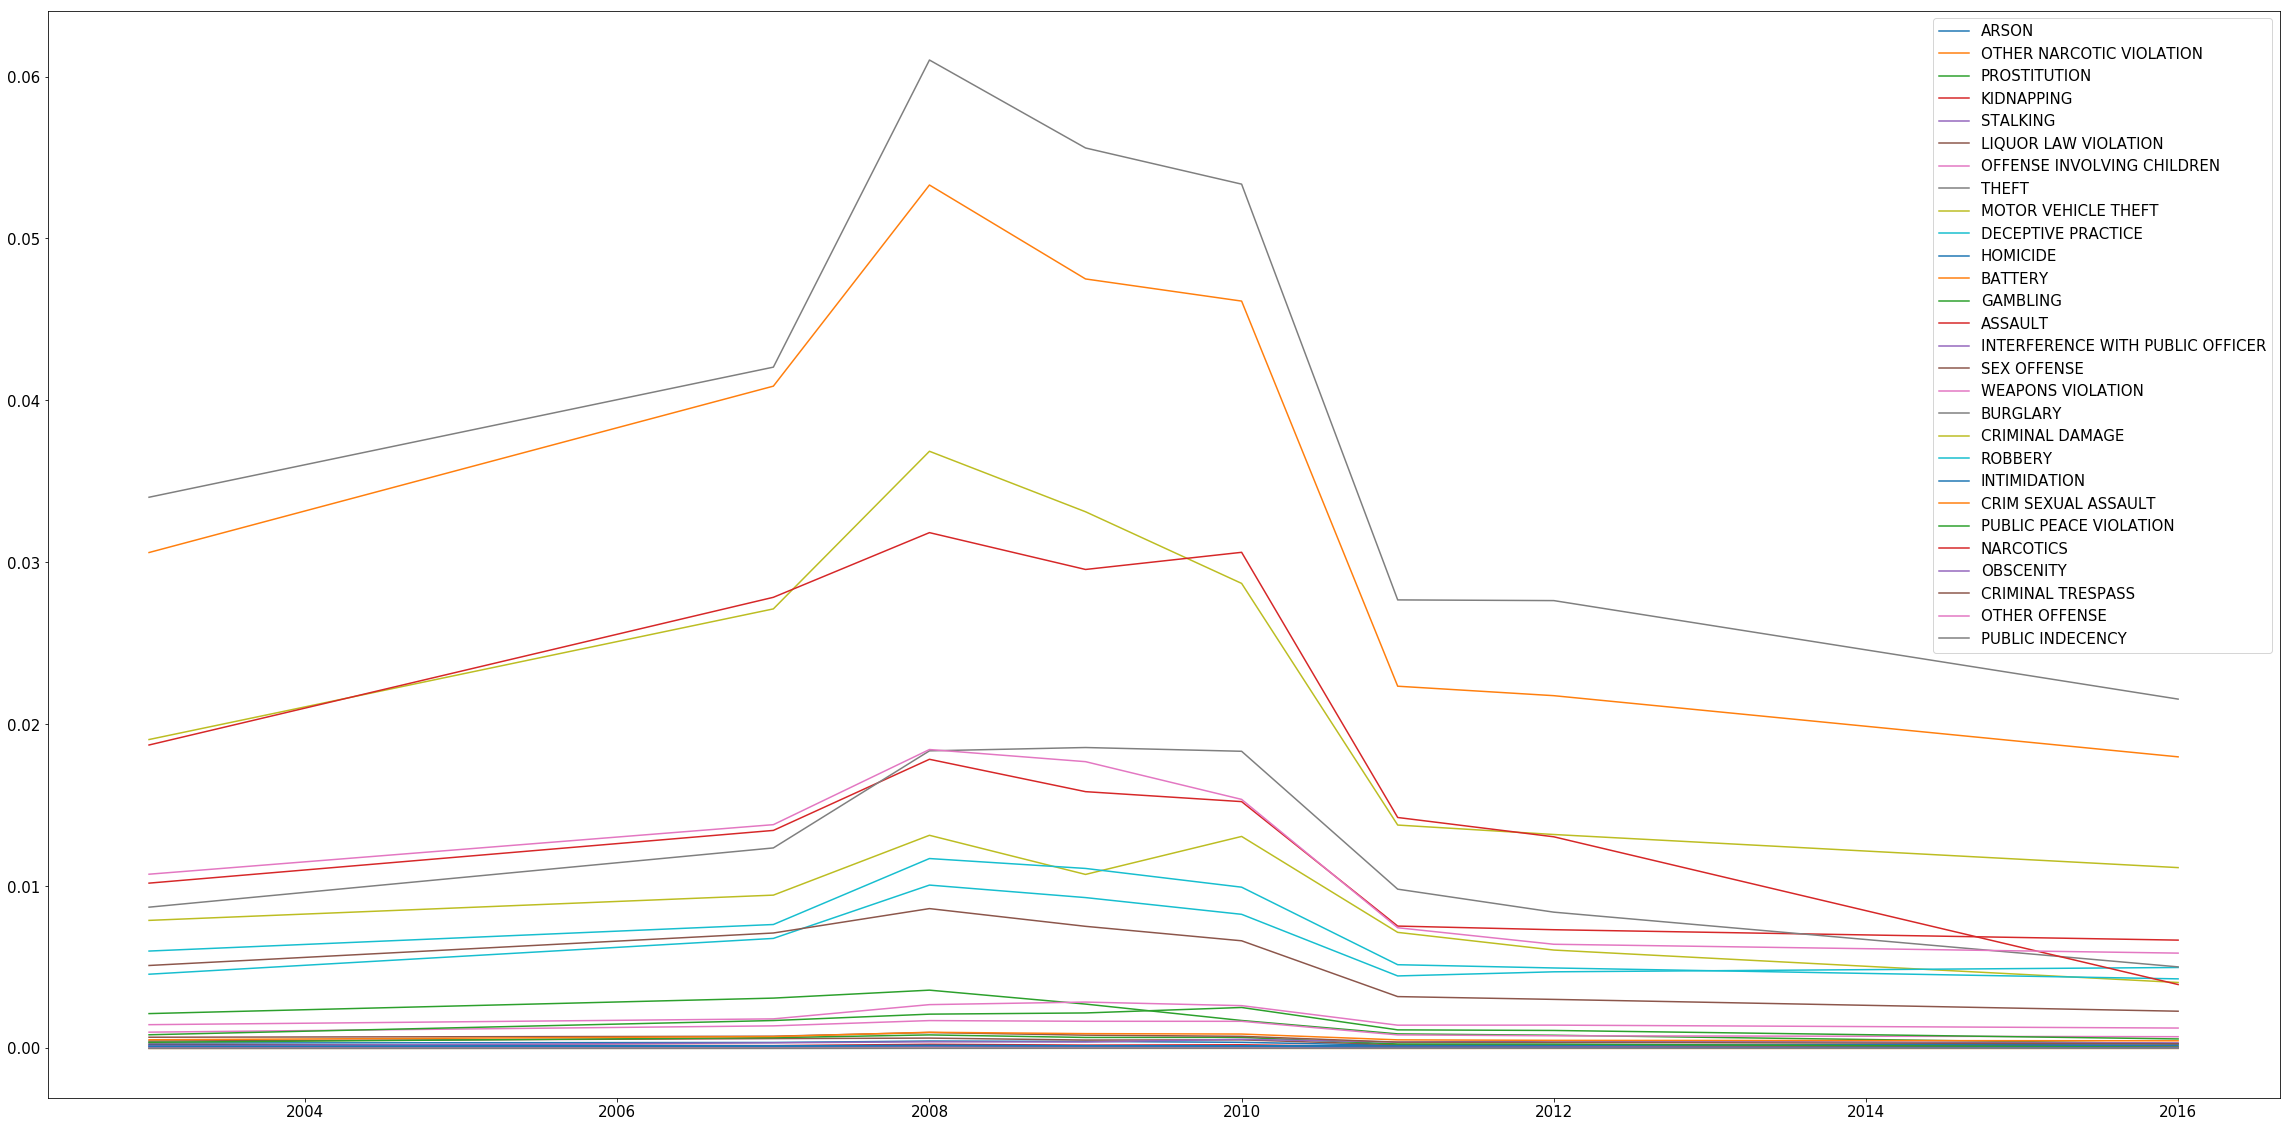

In [42]:
all_crime_datasets = [df_2003, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2016]
crime_per_capita_categorized = []
common_crimes = set()
for dataset in all_crime_datasets:
    print(f"Name:{dataset.name}")
    if (not len(common_crimes)):
        common_crimes = set(dataset["Primary Type"].values)
    else:
        common_crimes = common_crimes.intersection(set(dataset["Primary Type"].values))
common_crimes = list(common_crimes)
for crime in common_crimes:
    crime_per_capita_singleType = []
    for dataset in all_crime_datasets:
        crime_per_capita_singleType.append(len(dataset[dataset["Primary Type"] == crime]))
    crime_per_capita_categorized.append(np.array(crime_per_capita_singleType) / all_capita)

#print(len(crime_per_capita_categorized))
#for crime_data in crime_per_capita_categorized:
#    crime_data = np.array(crime_data) / all_capita
    #print(crime_data)
    
for i in range(len(common_crimes)):
    plt.plot(all_years, crime_per_capita_categorized[i], label=common_crimes[i])
plt.legend()

The above graph breaks the overall trend down to that representing the changes within each kind of crime. Several specific types of crimes dominated. The changes within most of the types of crimes goes along with the overall trend.

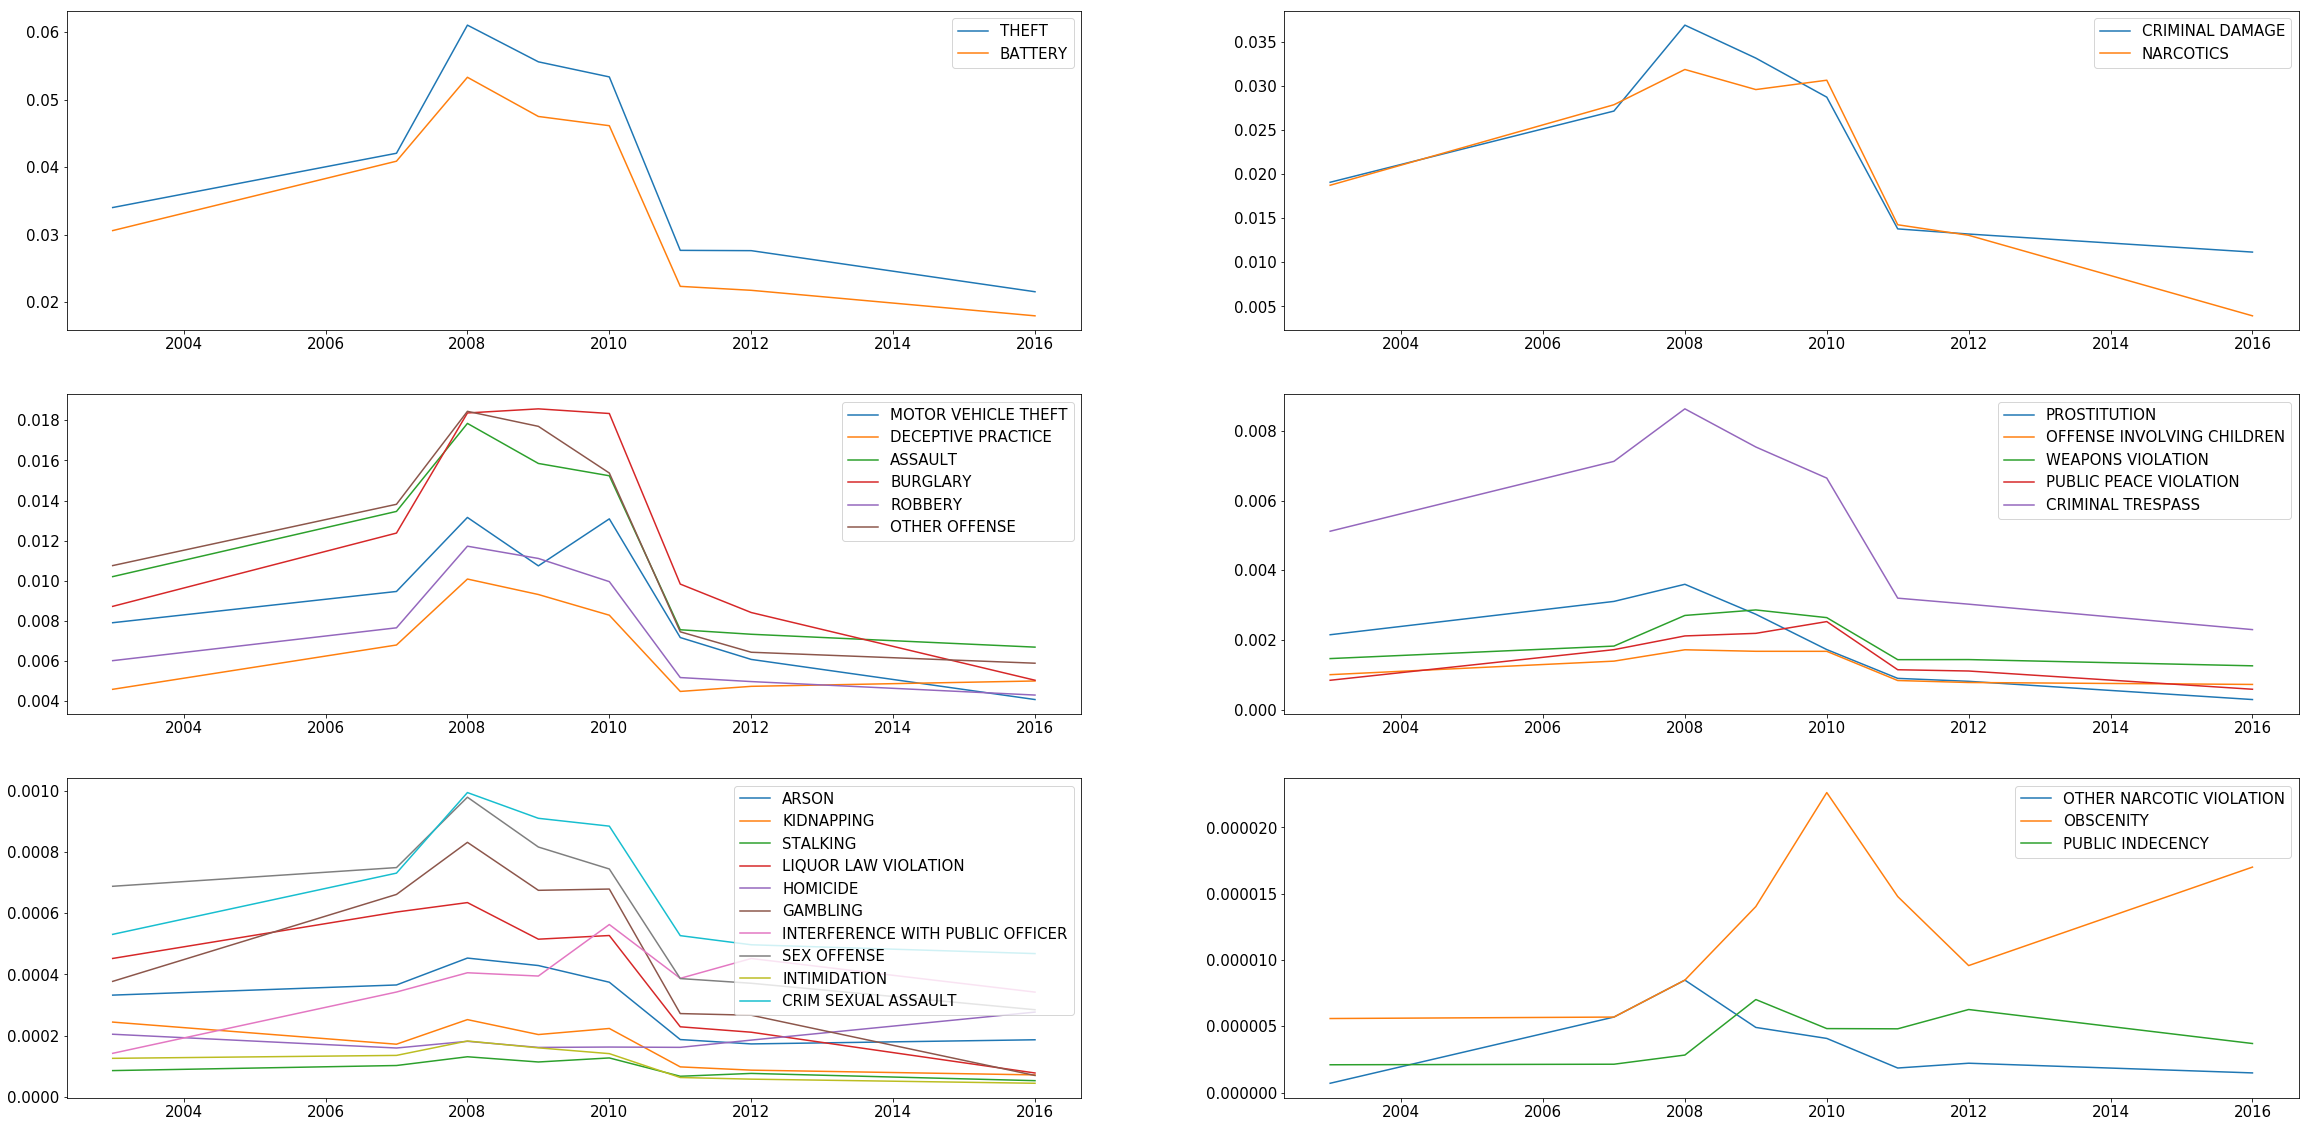

In [43]:
fst_tier = []
fst_types = []
sec_tier = []
sec_types = []
third_tier = []
third_types = []
fourth_tier = []
fourth_types = []
fifth_tier = []
fifth_types = []
sixth_tier = []
sixth_types = []
for i in range(len(common_crimes)):
    if any(crime_per_capita_categorized[i] > 0.04):
        fst_tier.append(crime_per_capita_categorized[i])
        fst_types.append(common_crimes[i])
    elif any(crime_per_capita_categorized[i] > 0.02):
        sec_tier.append(crime_per_capita_categorized[i])
        sec_types.append(common_crimes[i])
    elif any(crime_per_capita_categorized[i] > 0.01):
        third_tier.append(crime_per_capita_categorized[i])
        third_types.append(common_crimes[i])
    elif any(crime_per_capita_categorized[i] > 0.001):
        fourth_tier.append(crime_per_capita_categorized[i])
        fourth_types.append(common_crimes[i])
    elif any(crime_per_capita_categorized[i] > 0.0001):
        fifth_tier.append(crime_per_capita_categorized[i])
        fifth_types.append(common_crimes[i])
    else:
        sixth_tier.append(crime_per_capita_categorized[i])
        sixth_types.append(common_crimes[i])
counter = 0
plt.subplot(321)
for i in range(len(fst_tier)):
    plt.plot(all_years, fst_tier[i], label=fst_types[i])
    plt.legend()
plt.subplot(322)
for i in range(len(sec_tier)):
    plt.plot(all_years, sec_tier[i], label=sec_types[i])
    plt.legend()
plt.subplot(323)
for i in range(len(third_tier)):
    plt.plot(all_years, third_tier[i], label=third_types[i])
    plt.legend()
plt.subplot(324)
for i in range(len(fourth_tier)):
    plt.plot(all_years, fourth_tier[i], label=fourth_types[i])
    plt.legend()
plt.subplot(325)
for i in range(len(fifth_tier)):
    plt.plot(all_years, fifth_tier[i], label=fifth_types[i])
    plt.legend()
plt.subplot(326)
for i in range(len(sixth_tier)):
    plt.plot(all_years, sixth_tier[i], label=sixth_types[i])
    plt.legend()

We break down the previous huge graph into 6 smaller graphs, each of which represents a tier of crime types ranked from the dominant to the least dominant tiers in terms of crime rate (per capita). Theft and battery are the most prevelent types, followed by criminal damage and narotics. Note that the rate of most types dropped starting at year 2011, yet the rate for obscenity peaked at year 2010, kept dropping until 2012, but rose again in 2016.

In [39]:
df_2007.name

'Crime in 2007'